In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

## Codigo urbanistico (actualizado a 3/12/2020)

* Diccionario de fields en [link](https://data.buenosaires.gob.ar/dataset/codigo-urbanistico/resource/40e01734-0798-426d-9969-b7a6ce1ea693)

In [2]:
comunas = gpd.read_file('https://storage.googleapis.com/python_mdg/carto_cursos/comunas.zip')
zona_sur = comunas[comunas['COMUNAS'].isin([4,8])].copy()

In [3]:
cu_root ='https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/codigo-urbanistico/codigo-urbanistico.geojson'
cu = gpd.read_file(cu_root)

In [4]:
sur = zona_sur.to_crs(cu.crs)
cu_sur = cu.clip(sur)

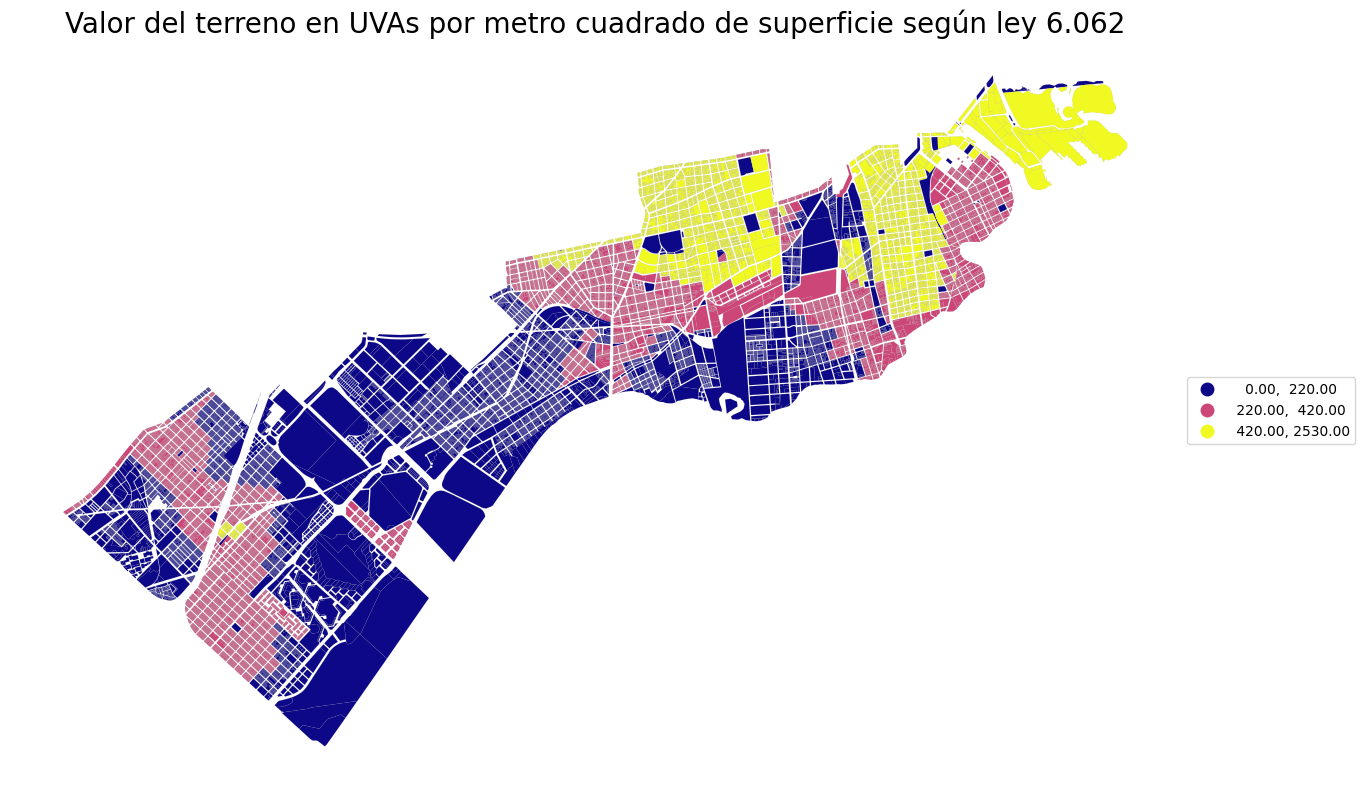

In [5]:
f,ax = plt.subplots(figsize=(14,8))
cu_sur.plot(ax=ax, column='inc_uva_19', k=3, cmap='plasma', 
                  scheme='NaturalBreaks', edgecolor='gray', linewidth=0.05,
                  legend=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_axis_off()
ax.set_title('Valor del terreno en UVAs por metro cuadrado de superficie según ley 6.062',fontsize=20)
plt.tight_layout();

In [6]:
cu_sur['inc_uva_19']

261372       0.0
261397       0.0
261430    2530.0
261306    1730.0
261301    1730.0
           ...  
209747     140.0
181090     140.0
209740     140.0
209746     140.0
208606     140.0
Name: inc_uva_19, Length: 45630, dtype: float64

* Referencia uva a pesos aca: https://ikiwi.net.ar/calculadoras/uva-a-pesos/

* Referencia dolar: https://www.ambito.com/contenidos/dolar.html

In [7]:
ref_uva = 144.15
cambio_dolar = 291
cu_sur['uva19_ARS'] = cu_sur['inc_uva_19'].apply(lambda x: x*ref_uva)
cu_sur['USD'] = cu_sur['uva19_ARS'].apply(lambda x: x/cambio_dolar)

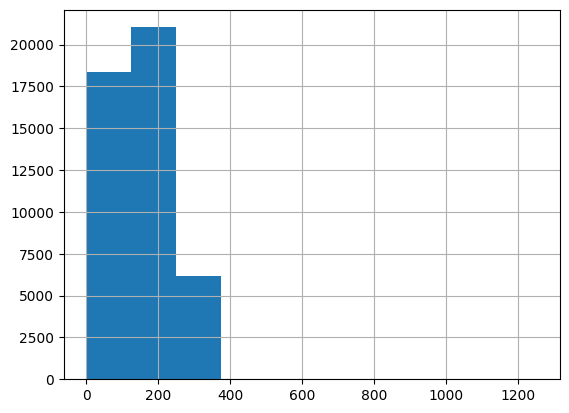

In [8]:
cu_sur['USD'].hist();

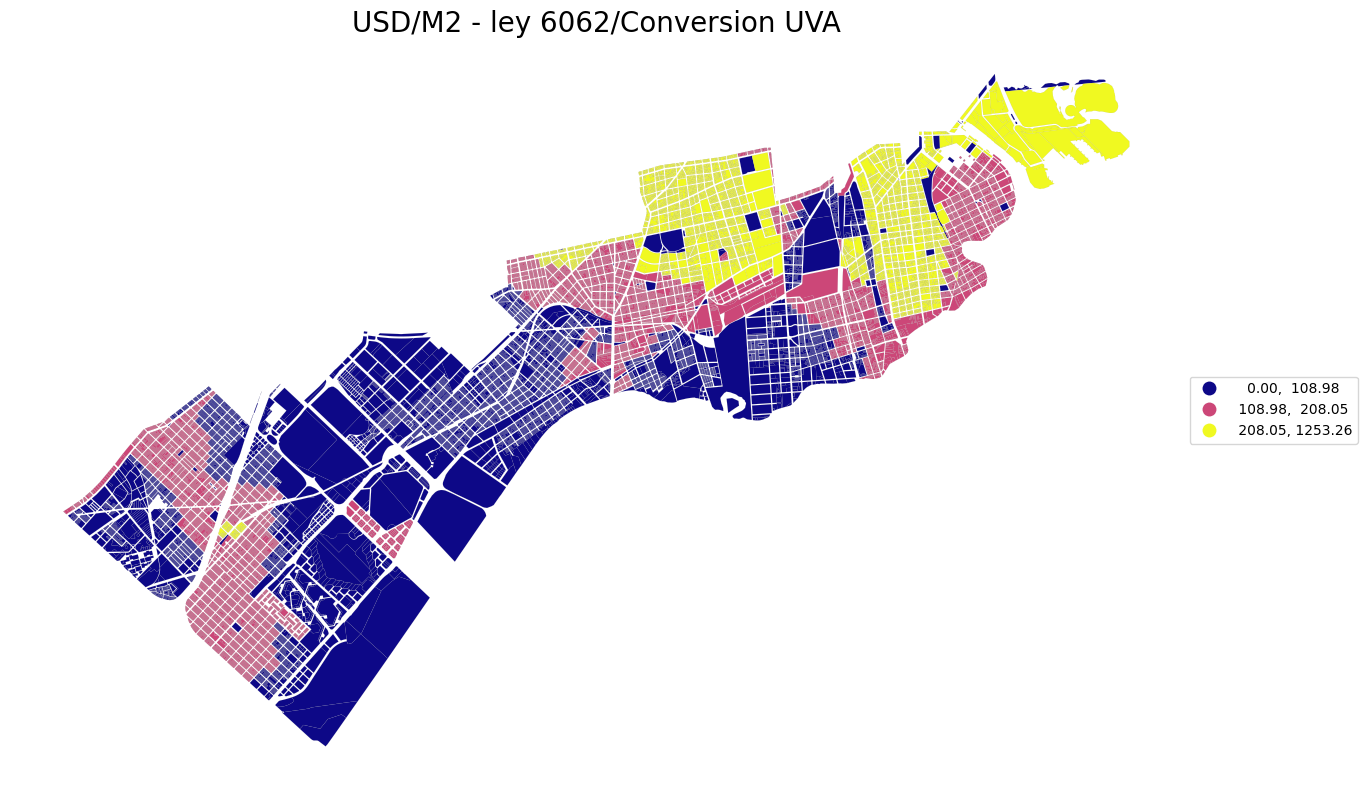

In [9]:
f,ax = plt.subplots(figsize=(14,8))
cu_sur.plot(ax=ax, column='USD', k=3, cmap='plasma', 
                  scheme='NaturalBreaks', edgecolor='gray', linewidth=0.05,
                  legend=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
ax.set_axis_off()
ax.set_title('USD/M2 - ley 6062/Conversion UVA',fontsize=20)
plt.tight_layout();